In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#Importar datos
df = pd.read_csv('Mexico_2023_clean.csv')
df.head()
print(df.columns.tolist())

['sales', 'employees_perm', 'employees_temp', 'year_start', 'interview_year', 'exporter_indirect', 'exporter_direct', 'competition_level', 'training', 'financing_obstacle', 'employees_total', 'age', 'exporter', 'labor_productivity']


**Regresion lineal simple**

In [12]:
#La variable a analizar será la productividad laboral
df['labor_productivity'].describe()

count    9.640000e+02
mean     5.486886e+05
std      3.531601e+05
min      3.800000e+04
25%      3.312818e+05
50%      4.922691e+05
75%      6.722859e+05
max      2.787879e+06
Name: labor_productivity, dtype: float64

La media y la mediana no estan tan alejados en valores, asi que no se encuentra muy sesgado

In [86]:
#Variables a analizar.
#Se buscará relación para observar si la productividad laboral está influida por los datos independientes
# Definir variables
X_simple = df[['training',
        'exporter',
        'financing_obstacle',
        'competition_level',
        'age',
        'employees_total']]
y_simple = df['labor_productivity']

In [37]:
# Entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_simple, y_simple, test_size=0.3, random_state=0)

In [38]:
#Entrenar modelo
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_train)

In [39]:
# Predicciones
y_pred = model.predict(X_test)

In [40]:
# Metricas
print('Coeficients: \n', model.coef_)
print('Independent term: \n', model.intercept_)

print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
print("Score en Test: %.4f" % model.score(X_test, Y_test))
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

Coeficients: 
 [-54472.01968079  62583.66402213  -1848.37933331 -17896.07089467
    841.46389922     83.11777818]
Independent term: 
 498331.57361845236
Mean squared error: 84616118520.28
Score en Test: -0.0087
Variance score: -0.01


**Observaciones**

Que el score esté en negativo nos indica que el modelo no predice bien los datos y que es pero que simplemente usar la media.
Posiblemente las variables elegidas no sean las correctas para determinar la productividad o que sus relaciones sean no lineales.
El MSE posiblemente sea tan alto, primero porque los datos se miden en millones y por la posible existencia de valores atipicos.
En general, los factores que definen la productividad pueden ser más o diferentes a los elegidos.
El modelo no es el correcto para poder predecir datos.

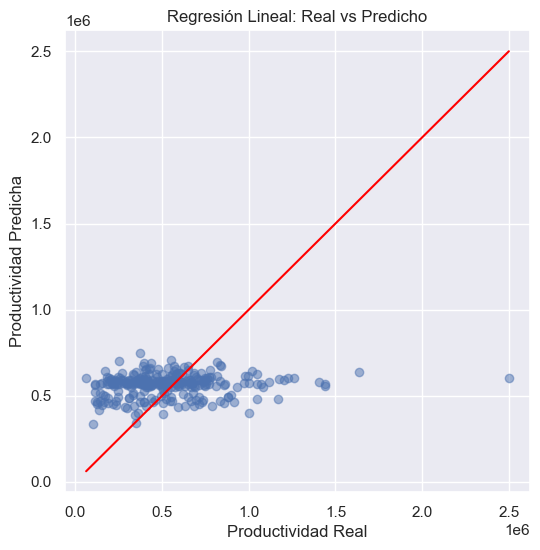

In [41]:
#Grafica de datos predecidos vs reales
sns.set_theme()

plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color='red')
plt.xlabel("Productividad Real")
plt.ylabel("Productividad Predicha")
plt.title("Regresión Lineal: Real vs Predicho")
plt.show()


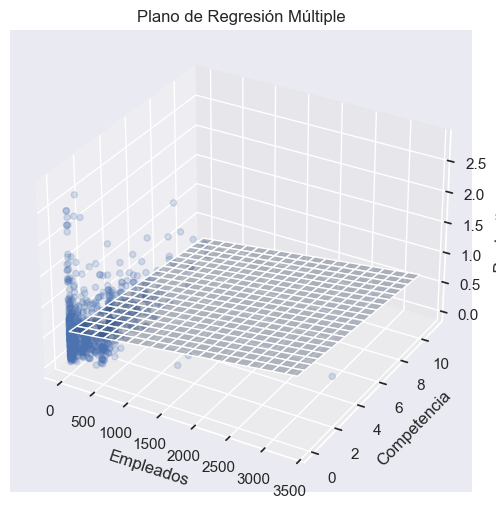

In [95]:
#Grafica 3D
X1 = df['employees_total']
X2 = df['competition_level']
Z = df['labor_productivity']


X_plane = df[['employees_total','competition_level']]
y_plane = df['labor_productivity']

model_plane = LinearRegression()
model_plane.fit(X_plane, y_plane)

# Malla
x_surf, y_surf = np.meshgrid(
    np.linspace(X1.min(), X1.max(), 20),
    np.linspace(X2.min(), X2.max(), 20)
)

onlyX = np.array([x_surf.ravel(), y_surf.ravel()]).T

onlyX_df = pd.DataFrame(onlyX, 
                        columns=['employees_total','competition_level'])

z_surf = model_plane.predict(onlyX_df)
z_surf = z_surf.reshape(x_surf.shape)

# Grafica
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, Z, alpha=0.2)
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3)

ax.set_xlabel("Empleados")
ax.set_ylabel("Competencia")
ax.set_zlabel("Productividad")

plt.title("Plano de Regresión Múltiple")
plt.show()

**Observaciones**
Observamos cómo los datos no se acoplan a la línea de predicción y en cambio se mantienen agrupados en el eje X en la izquierda. En el reporte se menciona que la mayoría de las empresas tienen una productividad baja. 

Esto puede indicar que el modelo no puede estimar valores altos y sin importar de qué tamaño sea la empresa, siempre mantiene la estimación cerca del promedio, lo cual muestra un sesgo pues el modelo no está aprendiendo realmente a diferenciar la productividad según las variables usadas.
Los datos y sus valores extremos o la diferencia entre estos también pueden estar influyendo. O en dado caso, que las variables elegidas no son suficientes o no presentan relaciones lineales.


**Conclusiones Finales**

Los resultados nos inidican que el modelo de regresión lineal multiple para definir si las variables independientes: training,exporter,
financing_obstacle,competition_level,age,employees_total, pueden ayduar a predecir la productividad de una empresa.
Según los resultados obtenidos, el modelo no puede explicar los datos modelados y el coeficiente obtenido menor a 0, nos indica que las variables
elegidas no son suficientes para poder determinar la productividad.
La grafica nos muestra como el modelo no logra estimar valores altos y como tiende a estimar valores cercanos al promedio, sin diferenciar entre
temaño de las empresas.
Finalmente, los resultados nos indican que el modelo de regresión lineal, como fue aplicado, resultó limitado.
    

______________________________________________________________________________________________
**Regresión Logistica**

_______________________________________________________________________________________________________________

In [49]:
#Definicion de exito de una empresa
mean_sales = df['sales'].mean()
df['successful'] = np.where(df['sales'] > mean_sales, 1, 0)

print(df['successful'].value_counts())

successful
0    658
1    306
Name: count, dtype: int64


In [52]:
#Definición de variables
X_log = df[[
    'employees_total',
    'training',
    'exporter',
    'financing_obstacle',
    'competition_level'   
]]
y_log = df['successful']

In [54]:
#Entrenamiento de datos
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.3, random_state=42)

In [55]:
#Creación del modelo
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [56]:
#Predccion de probabildiades
y_pred = log_model.predict(X_test)

In [58]:
#Evaluación de precisión
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8931034482758621


**Observaciones**
El modelo puede clasificar bien el 89% de las empresas. Asi que es una buena estimación.

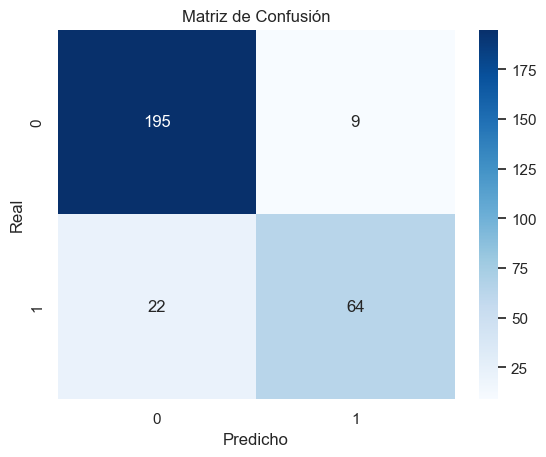

In [59]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

**Observaciones**
El modelo obtuvo 195 verdaderos falsos negativos y solo 9 falsos positivos.
Obtuvo 22 verdaderos positivos y 64 falsos negativos.

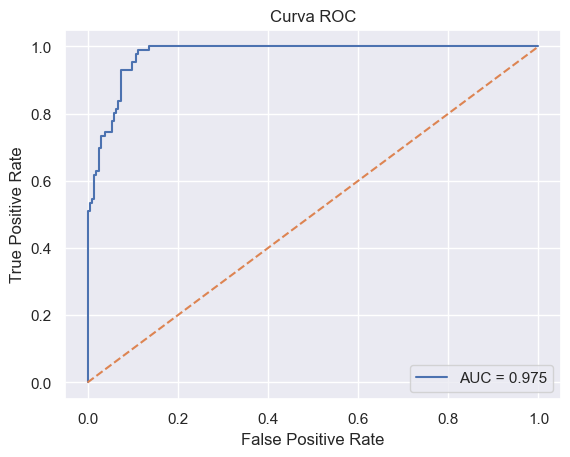

In [60]:
#Curva ROC
y_prob = log_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

**Observaciones**
Un AUC de 0.97 indica que el modelo es capaz de clasrificar correctamente el 97% de las empresas.

#Coeficientes
coef_df = pd.DataFrame({
    'Variable': X_log.columns,
    'Coeficiente': log_model.coef_[0]
})

coef_df.sort_values(by='Coeficiente', inplace=True)
print(coef_df)

**Observaciones**
Los coeficientes indican qué factores aumentan o reducen la probabilidad de éxito.
En este caso el primer valor training indica que las empresas que invirtieron más en capacitación,obtuvieron menos éxito.
Un mayor nivel de competencia ligeramente aumenta la probabilidad de éxito.
La dificultad de obtener financiamiento afecta muy poco a la probabilidad de éxito.
El número total de empleados afecta ligeramente a tener mayores probabilidades de éxito de la empresa
Si es exportador, aumenta ligeramente la probabilidad de éxito.

**Conclusiones de Regresion Logistica**

Según los resultados obtenidos. El modelo de regresión lógistica si puedo clasificar con mayor presición la probalididad de éxito de una
empresa usando las carácteristicas elegidas.

________________________________________

**Redes bayesiasnas**

_______________________________

In [67]:
df_by = df[['successful',
           'training',
           'financing_obstacle',
           'competition_level',
           'exporter']].copy()

In [69]:
#Tabla de probabilidad
prob_success = (
    df_by
    .groupby(['training',
              'financing_obstacle',
              'competition_level',
              'exporter'])['successful']
    .mean()
    .reset_index()
)

prob_success.head()

,training,financing_obstacle,competition_level,exporter,successful
0,0.0,1,-4.0,0,0.244444
1,0.0,1,-4.0,1,1.000000
2,0.0,1,1.0,0,0.000000
3,0.0,1,2.0,0,0.000000
4,0.0,1,3.0,0,0.000000


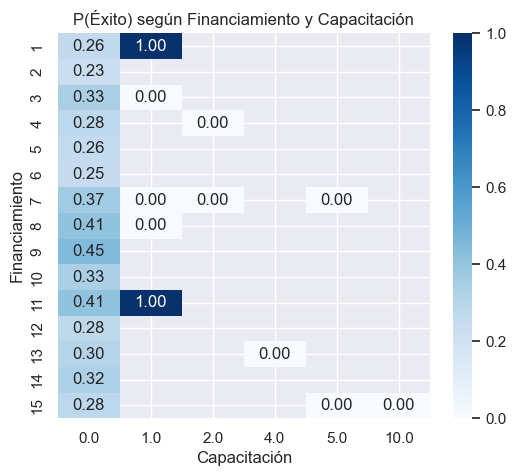

In [80]:
# Probabilidad conjunta
heat = (
    df_by
    .groupby(['financing_obstacle','training'])['successful']
    .mean()
    .unstack()
)

plt.figure(figsize=(6,5))
sns.heatmap(heat,
            annot=True,
            fmt=".2f",
            cmap="Blues")

plt.title("P(Éxito) según Financiamiento y Capacitación")
plt.ylabel("Financiamiento")
plt.xlabel("Capacitación")
plt.show()

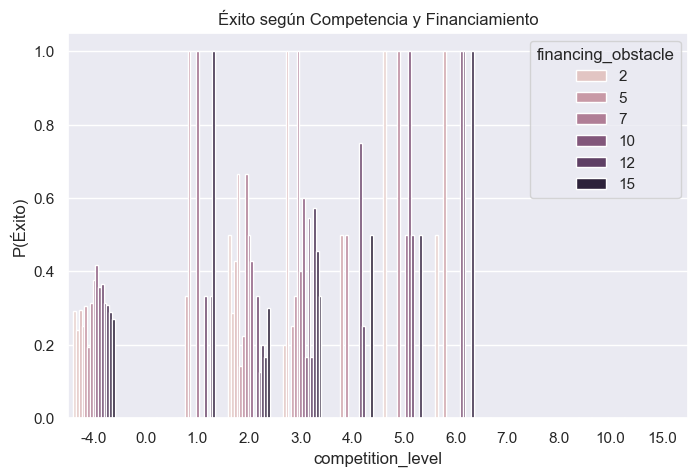

In [84]:
plt.figure(figsize=(8,5))

prob_comp = (
    df_by
    .groupby(['competition_level','financing_obstacle'])['successful']
    .mean()
    .reset_index()
)

sns.barplot(data=prob_comp,
            x='competition_level',
            y='successful',
            hue='financing_obstacle')

plt.ylabel("P(Éxito)")
plt.title("Éxito según Competencia y Financiamiento")
plt.show()

**Observaciones de las gráficas**

Se están usando heatmaps para poder observar la relación entre las variables de una manera más sencilla.
En ambas gráficas se puede observar que la mayoría de probabilidades de éxito de las empresas se encuentra en el rango entre 0.20 y 0.45.
Siendo que las empresas no tienen mucho éxito, lo cual es consistente con el informe real.
En la primera gráfica, la capacitación no parece ser un factor relevante para medir el éxito de una empresa.
Según la segunda gráfica, el financiamiento sí parece ser un factor que influye más en las probabilidades de éxito.


_____________________________

**Conclusiones finales**
¿Cuál modelo es más útil para un responsable de políticas públicas?

Yo me iría por los últimos dos.
La regresión lineal permite ver relaciones entre algunas variables, pero al tratarse de temas financieros, estos no siempre guardan relaciones
lineales entre ellos, ya que mucho de lo estudiado es multifactorial y este modelo no puede ajustarse bien a ese tipo de relaciones.

La regresión lógica, en cambio, tuvo mejores resultados y permitió encontrar mejor las relaciones entre variables para poder clasificar datos, por lo que sería útil como apoyo para la toma de decisiones.

Las redes bayesianas permiten entender mejor las relaciones y dependencias entre las variables, mejorando la comprensión de los datos.

De manera general, las redes bayesianas serían más útiles para un responsable de políticas públicas, para entender las relaciones de los datos y la 
Regresión logística para poder tomar decisiones sobre casos más particulares. 
